

# Trying Out Different Learning Acronyms

## ADEPT

- A:= analogy
- D:= diagram
- E:= example
- P:= plain english
- T:= technical definition

> This still needs a bridge into what the person cares about. So teachiing some formalization technique or trick to bring that person's interests into the problem/concept

In [107]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableParallel
from langchain.chat_models import ChatOpenAI

def chain_analogy(llm):
    return ChatPromptTemplate.from_template("Write a simple analogy for this concept: '''{concept}''', which should perfectly encapsulate\
        what it is.") | llm

def chain_diagram(llm):
    return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
        what it is and what it relates to.") | llm


def chain_example(llm):
    return ChatPromptTemplate.from_template("Write down five examples that perfectly demonstrate this concept: '''{concept}'''. ") | llm


def chain_plain_english(llm):
    return ChatPromptTemplate.from_template("Write a plain english definition for this concept: '''{concept}'''") | llm


def chain_technical_definition(llm):
    return ChatPromptTemplate.from_template("Write a short and precise technical definition for this concept: '''{concept}'''") | llm


llm_chat = ChatOpenAI()

analogy_chain = chain_analogy(llm_chat)
diagram_chain = chain_diagram(llm_chat)
example_chain = chain_example(llm_chat)
plain_english_chain = chain_plain_english(llm_chat)
technical_definition_chain = chain_technical_definition(llm_chat)


concept = "joint probability mass function"
map_chain = RunnableParallel(analogy=analogy_chain, diagram=diagram_chain, example=example_chain, 
                             plain_english=plain_english_chain, technical_def=technical_definition_chain)
output_explanation = map_chain.invoke({"concept": concept})
output_explanation

In [16]:
from IPython.display import Markdown, display


for key in output_explanation.keys():
    display(Markdown(f"**{key}**\n\n{output_explanation[key].content}\n\n"))

**analogy**

A joint probability mass function is like a recipe book that tells you the chances of getting a specific combination of ingredients in a dish.



**diagram**

Here is a knowledge graph explaining the concept of a "joint probability mass function":

[Joint Probability Mass Function]
- Definition: A joint probability mass function (joint PMF) is a function that assigns probabilities to the possible outcomes of multiple random variables.
- Purpose: It describes the probability distribution of a set of random variables by assigning probabilities to each combination of their possible values.
- Related Concepts:
  - Probability: The likelihood of an event occurring.
  - Random Variables: Variables that can take on different values based on the outcome of a random phenomenon.
  - Probability Distribution: A function that describes the probabilities of different outcomes in a sample space.
  - Discrete Random Variables: Random variables that take on a countable number of distinct values.
  - Marginal Probability: The probability distribution of an individual random variable, ignoring the other variables.
  - Conditional Probability: The probability of an event occurring given that another event has already occurred.
- Example:
  - Consider two discrete random variables X and Y.
  - The joint PMF P(X, Y) assigns probabilities to all possible combinations of values for X and Y.
  - The values in the joint PMF must be non-negative and sum up to 1.
- Notation:
  - P(X, Y) or P(X=x, Y=y): Denotes the joint probability that X takes on value x and Y takes on value y.
- Properties:
  - Non-Negativity: P(X, Y) ≥ 0 for all possible combinations of X and Y.
  - Summation: ∑∑P(X, Y) = 1, where the summation is taken over all possible combinations of X and Y.
- Relationships:
  - Marginal PMF: By summing or integrating the joint PMF over one variable, we can obtain the marginal PMF for the other variable.
  - Conditional PMF: Dividing the joint PMF by the marginal PMF of a variable yields the conditional PMF for the other variable.
- Applications:
  - Used in statistics, probability theory, and data analysis to model and analyze the relationships between multiple random variables.
  - Enables the calculation of probabilities for various events and helps understand the dependencies between different variables.
  - Important in areas such as machine learning, econometrics, and genetics for modeling complex systems and making predictions.

Note: This knowledge graph provides a concise representation of the concept, but additional details and examples can be added based on specific requirements.



**example**

1) Consider a fair six-sided die. The joint probability mass function can be represented as a table with the probabilities of each possible outcome when rolling two dice simultaneously. For instance, P(X=1, Y=1) = 1/36, P(X=2, Y=3) = 1/36, etc.

2) In a card game, suppose you draw two cards from a standard deck without replacement. The joint probability mass function would describe the probabilities of each possible combination of cards being drawn. For example, P(X=King of Hearts, Y=Queen of Diamonds) = 1/221, P(X=4 of Clubs, Y=4 of Diamonds) = 1/221, etc.

3) Imagine a manufacturing process that produces light bulbs, where some bulbs are defective and others are not. The joint probability mass function can be used to describe the probabilities of different combinations of defects in a sample of bulbs. For instance, P(X=3 defective bulbs, Y=2 non-defective bulbs) = 0.05, P(X=0 defective bulbs, Y=5 non-defective bulbs) = 0.15, etc.

4) In a survey, respondents are asked to rate a product on a scale of 1 to 5 for quality and a scale of 1 to 5 for satisfaction. The joint probability mass function would show the probabilities of different combinations of responses. For example, P(X=3 quality rating, Y=5 satisfaction rating) = 0.08, P(X=2 quality rating, Y=2 satisfaction rating) = 0.12, etc.

5) Let's say you have two coins, one fair and the other biased. The joint probability mass function can describe the probabilities of different combinations of outcomes when flipping both coins simultaneously. For instance, P(X=Heads on fair coin, Y=Tails on biased coin) = 1/4, P(X=Tails on fair coin, Y=Tails on biased coin) = 1/4, etc.



**plain_english**

A joint probability mass function is a way of describing the probability of two or more random variables occurring together. It tells us the likelihood of specific combinations of values for these variables happening at the same time.



**technical_def**

A joint probability mass function refers to a function that assigns probabilities to multiple discrete random variables. It calculates the probability of a particular combination of outcomes occurring simultaneously for these variables.



Ok, this is nice but can we make it better? Like the knowledge graph is not visual, how can we improve upon that? 

In [20]:
# !pip install --upgrade pydantic

In [137]:
# from pydantic import BaseModel, Field
from langchain.pydantic_v1 import BaseModel, Field
from typing import List
from graphviz import Digraph
import argparse
from langchain.output_parsers import PydanticOutputParser
import graphviz
from IPython.display import display

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"

class KnowledgeGraph(BaseModel):
    """A knowledge graph is a graph that represents knowledge as a set of entities and relations between them."""
    nodes: List[Node] = Field(..., description="A list of nodes in the knowledge graph")
    edges: List[Edge] = Field(..., description="A list of edges in the knowledge graph")


def visualize_knowledge_graph(kg: KnowledgeGraph):
    dot = Digraph(comment="Knowledge Graph")

    # Add nodes
    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    # Add edges
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    # Render the graph
    display(graphviz.Source(dot.source))

Now, let's modify the `chain_diagram()` function to output a schema that's appropriate for generating a knowledge graph.

In [126]:
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph)

llm_chat = ChatOpenAI()    
llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])

chain = chain_diagram(llm_with_tools)
concept = "joint probability mass function"

output_graph = chain.invoke({"concept": concept})
output_graph

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{\n  "nodes": [\n    {"id": 1, "label": "Random Variable", "color": "lightblue"},\n    {"id": 2, "label": "Probability Distribution", "color": "lightblue"},\n    {"id": 3, "label": "Joint Probability Mass Function", "color": "lightgreen"},\n    {"id": 4, "label": "Discrete Random Variables", "color": "lightblue"},\n    {"id": 5, "label": "Probability Mass Function", "color": "lightgreen"}\n  ],\n  "edges": [\n    {"source": 1, "target": 2, "label": "has", "color": "black"},\n    {"source": 2, "target": 3, "label": "has", "color": "black"},\n    {"source": 1, "target": 4, "label": "is a", "color": "black"},\n    {"source": 4, "target": 5, "label": "has", "color": "black"}\n  ]\n}', 'name': 'KnowledgeGraph'}})

Ok, so we are getting the right output, which we can access like this:

In [131]:
output_graph.additional_kwargs["function_call"]["arguments"]

'{\n  "nodes": [\n    {"id": 1, "label": "Random Variable", "color": "lightblue"},\n    {"id": 2, "label": "Probability Distribution", "color": "lightblue"},\n    {"id": 3, "label": "Joint Probability Mass Function", "color": "lightgreen"},\n    {"id": 4, "label": "Discrete Random Variables", "color": "lightblue"},\n    {"id": 5, "label": "Probability Mass Function", "color": "lightgreen"}\n  ],\n  "edges": [\n    {"source": 1, "target": 2, "label": "has", "color": "black"},\n    {"source": 2, "target": 3, "label": "has", "color": "black"},\n    {"source": 1, "target": 4, "label": "is a", "color": "black"},\n    {"source": 4, "target": 5, "label": "has", "color": "black"}\n  ]\n}'

But we want this output to be perfectly tailored for a function that visualizes the graph, so let's do that. 

In [133]:
from langchain.output_parsers import PydanticOutputParser

pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)

output_graph_json_dict = output_graph.additional_kwargs["function_call"]["arguments"]
output_graph_json_dict 

'{\n  "nodes": [\n    {"id": 1, "label": "Random Variable", "color": "lightblue"},\n    {"id": 2, "label": "Probability Distribution", "color": "lightblue"},\n    {"id": 3, "label": "Joint Probability Mass Function", "color": "lightgreen"},\n    {"id": 4, "label": "Discrete Random Variables", "color": "lightblue"},\n    {"id": 5, "label": "Probability Mass Function", "color": "lightgreen"}\n  ],\n  "edges": [\n    {"source": 1, "target": 2, "label": "has", "color": "black"},\n    {"source": 2, "target": 3, "label": "has", "color": "black"},\n    {"source": 1, "target": 4, "label": "is a", "color": "black"},\n    {"source": 4, "target": 5, "label": "has", "color": "black"}\n  ]\n}'

In [134]:
pydantic_output_parser.parse(output_graph_json_dict)

KnowledgeGraph(nodes=[Node(id=1, label='Random Variable', color='lightblue'), Node(id=2, label='Probability Distribution', color='lightblue'), Node(id=3, label='Joint Probability Mass Function', color='lightgreen'), Node(id=4, label='Discrete Random Variables', color='lightblue'), Node(id=5, label='Probability Mass Function', color='lightgreen')], edges=[Edge(source=1, target=2, label='has', color='black'), Edge(source=2, target=3, label='has', color='black'), Edge(source=1, target=4, label='is a', color='black'), Edge(source=4, target=5, label='has', color='black')])

Yay! As you can see above, the output of parsing with the pydantic_output_parser is the `KnowledgeGraph` object, which we can feed into the 
`visualize_graph` function to get the final output.

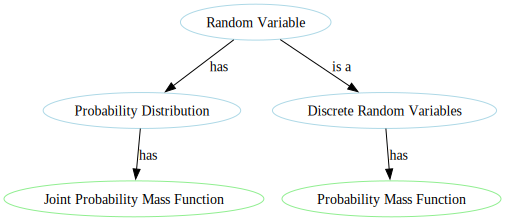

In [138]:
kg = pydantic_output_parser.parse(output_graph_json_dict)

visualize_knowledge_graph(kg)

Yaaay victory!!! Now, let's wrap this into a modified version of the original chain by using the RunnableLambda Object to do the 
intermediary step we were doing before.

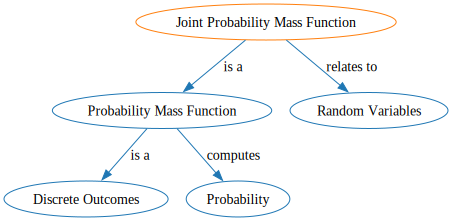

In [139]:
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
from langchain.schema.runnable import RunnableLambda

chain = chain_diagram(llm_with_tools)


def chain_diagram_viz(llm):
    """Full chain to generate the formatted knowledge graph"""
    openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph)
    llm_chat = ChatOpenAI()    
    llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])
    pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)
    return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
        what it is and what it relates to.") | llm_with_tools | RunnableLambda(lambda x: x.additional_kwargs["function_call"]["arguments"]) | pydantic_output_parser
    
concept = "joint probability mass function" 

output_graph = chain_diagram_viz(llm_with_tools).invoke({"concept": concept})
visualize_knowledge_graph(output_graph)

Nice! How about we put everything together under a class that represents this LangChain implementation of the ADEPT method?

In [158]:
from dataclasses import dataclass
from typing import Any
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableParallel
from langchain.chat_models import ChatOpenAI

@dataclass
class ADEPT:
    concept: str
    llm_chat = ChatOpenAI()
    
    def chain_analogy(self):
        return ChatPromptTemplate.from_template("Write a simple analogy for this concept: '''{concept}''', which should perfectly encapsulate\
            what it is.") | llm_chat

    
    def chain_diagram_viz(self):
        """Full chain to generate the formatted knowledge graph"""
        openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph) 
        llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])
        pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)
        return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
            what it is and what it relates to.") | llm_with_tools | RunnableLambda(lambda x: x.additional_kwargs["function_call"]["arguments"]) | pydantic_output_parser
        

    def chain_example(self):
        return ChatPromptTemplate.from_template("Write down five examples that perfectly demonstrate this concept: '''{concept}'''. ") | llm_chat


    def chain_plain_english(self):
        return ChatPromptTemplate.from_template("Write a plain english definition for this concept: '''{concept}'''") | llm_chat


    def chain_technical_definition(self):
        return ChatPromptTemplate.from_template("Write a short and precise technical definition for this concept: '''{concept}'''") | llm_chat
    
    def visualize_knowledge_graph(self, kg: KnowledgeGraph):
        dot = Digraph(comment="Knowledge Graph")

        # Add nodes
        for node in kg.nodes:
            dot.node(str(node.id), node.label, color=node.color)

        # Add edges
        for edge in kg.edges:
            dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

        # Render the graph
        display(graphviz.Source(dot.source))
        
    # now let's write a __call__ method that runs all of the chains and generates a nice output just from the concept input.
    def __call__(self):
        analogy_chain = self.chain_analogy()
        diagram_chain = self.chain_diagram_viz()
        example_chain = self.chain_example()
        plain_english_chain = self.chain_plain_english()
        technical_definition_chain = self.chain_technical_definition()
        map_chain = RunnableParallel(analogy=analogy_chain, diagram=diagram_chain, example=example_chain, 
                             plain_english=plain_english_chain, technical_def=technical_definition_chain)
        output_explanation = map_chain.invoke({"concept": self.concept})
        return output_explanation


In [159]:
concept = "joint probability mass function"

adept = ADEPT(concept)
adept

ADEPT(concept='joint probability mass function')

In [160]:
output_explanation = adept()

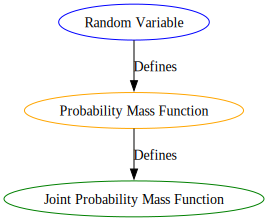

In [162]:
diagram = output_explanation["diagram"]

adept.visualize_knowledge_graph(diagram)

In [163]:
output_explanation["analogy"].content

'A joint probability mass function is like a recipe book for a potluck party. Just as the recipe book tells you the likelihood of different dishes being prepared by different people, the joint probability mass function tells you the likelihood of different combinations of events occurring together.'

In [164]:
output_explanation["example"].content

'1) Suppose we have two dice, one fair and the other biased. The joint probability mass function can be used to calculate the probability of obtaining a sum of 7 when rolling both dice simultaneously. \n\n2) In a card game, the joint probability mass function can be used to determine the probability of drawing two cards of the same suit from a standard deck of cards. \n\n3) When conducting a survey, the joint probability mass function can be used to calculate the probability of two participants giving the same response to a particular question. \n\n4) In a sports tournament, the joint probability mass function can be used to calculate the probability of two teams facing each other in the final match, given their performance in earlier rounds. \n\n5) In a genetics experiment, the joint probability mass function can be used to determine the probability of obtaining a certain combination of genes in an offspring, based on the genetic makeup of the parents.'

In [166]:
output_explanation["plain_english"].content

'A joint probability mass function is a way to calculate the probability of two or more random variables occurring at the same time. It helps us understand the likelihood of different combinations of outcomes happening together.'

In [167]:
output_explanation["technical_def"].content

'A joint probability mass function refers to a mathematical function that assigns probabilities to all possible combinations of values in multiple discrete random variables. It provides a measure of the likelihood of simultaneous occurrences of specific outcomes in the variables under consideration.'